# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np

In [30]:
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [7]:
sensor.isna().any(axis=None)



False

In [9]:
sensor.isna().count()

attitude.roll         1751
attitude.pitch        1751
attitude.yaw          1751
gravity.x             1751
gravity.y             1751
gravity.z             1751
rotationRate.x        1751
rotationRate.y        1751
rotationRate.z        1751
userAcceleration.x    1751
userAcceleration.y    1751
userAcceleration.z    1751
dtype: int64

How many rows and columns are in our data?

In [11]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [18]:
sensor["time"] = pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", periods=sensor.shape[0])

In [19]:
sensor = sensor.set_index("time")

In [21]:
sensor.sample()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
time                                                                          
2018-01-01 00:12:48       1.167527       -0.631596      2.286455   0.742344   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
time                                                                        
2018-01-01 00:12:48   0.590433  -0.316723       -1.520345        0.991835   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
time                                                                          
2018-01-01 00:12:48       -1.135133            0.168361           -0.190256   

                     userAcceleration.z  
time                                     
2018-01-01 00:12:48           -0.120899

Assign the time series index to the dataframe's index.

In [23]:
sensor.index.freq = pd.infer_freq(sensor.index)
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', name='time', length=1751, freq='S')

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

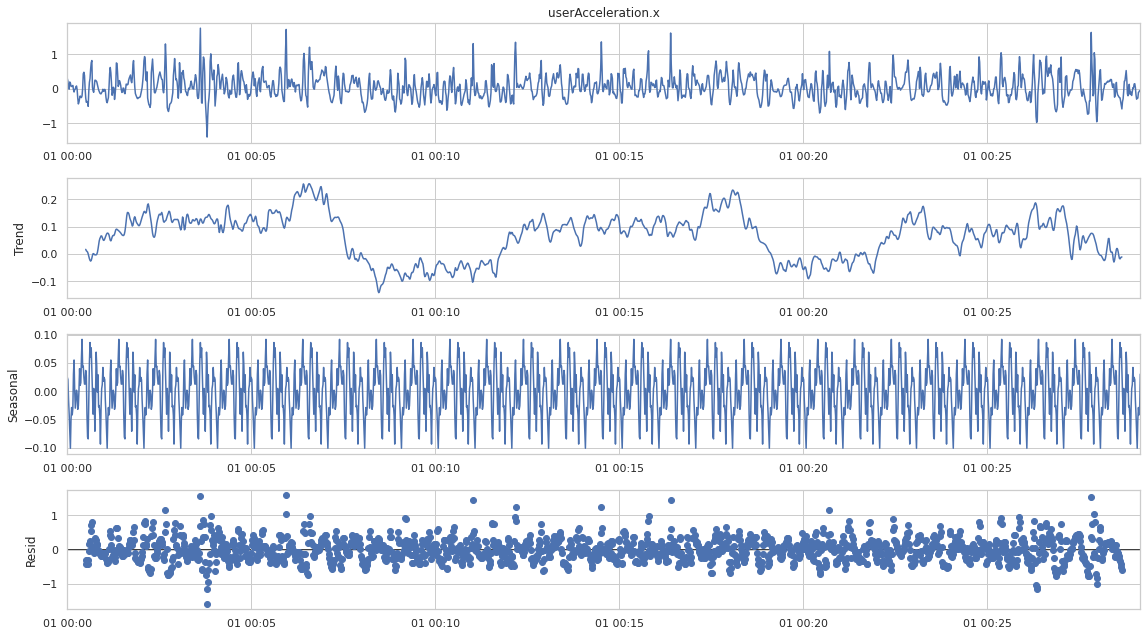

In [31]:
res = seasonal_decompose(sensor["userAcceleration.x"], model="additive", period=60)
res.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

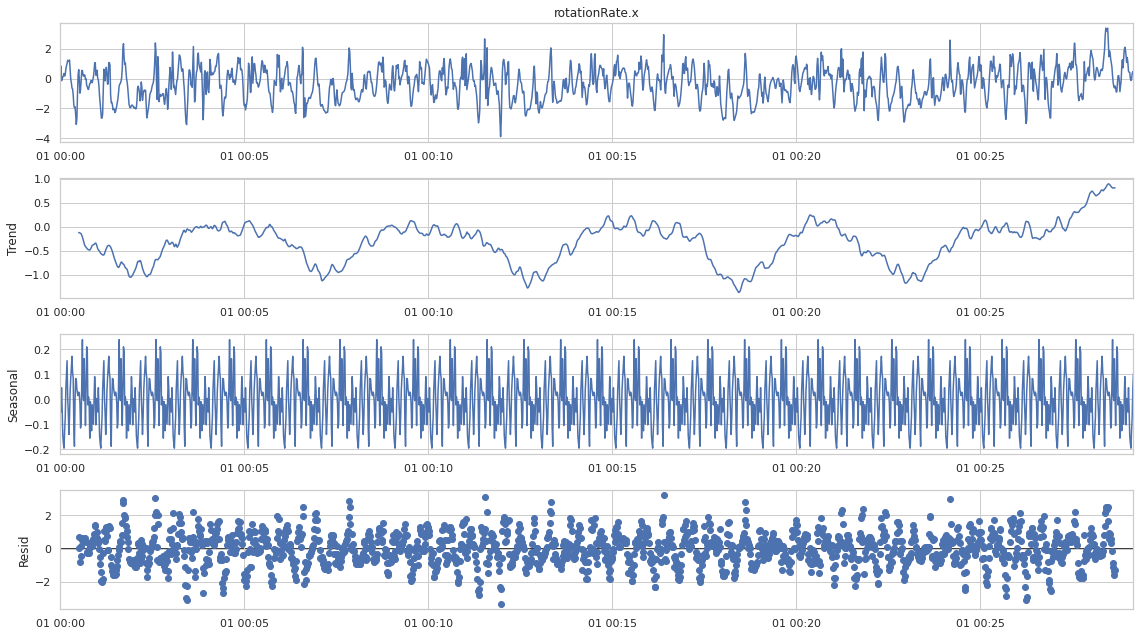

In [32]:
res = seasonal_decompose(sensor["rotationRate.x"], model="additive", period=60)
res.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

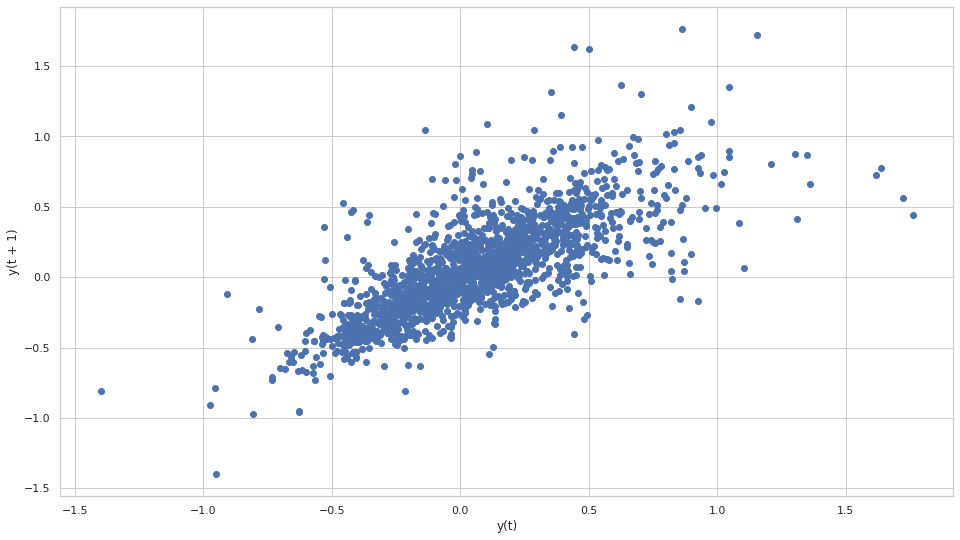

In [37]:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1, c="b");

Create a lag plot for `rotationRate.x`

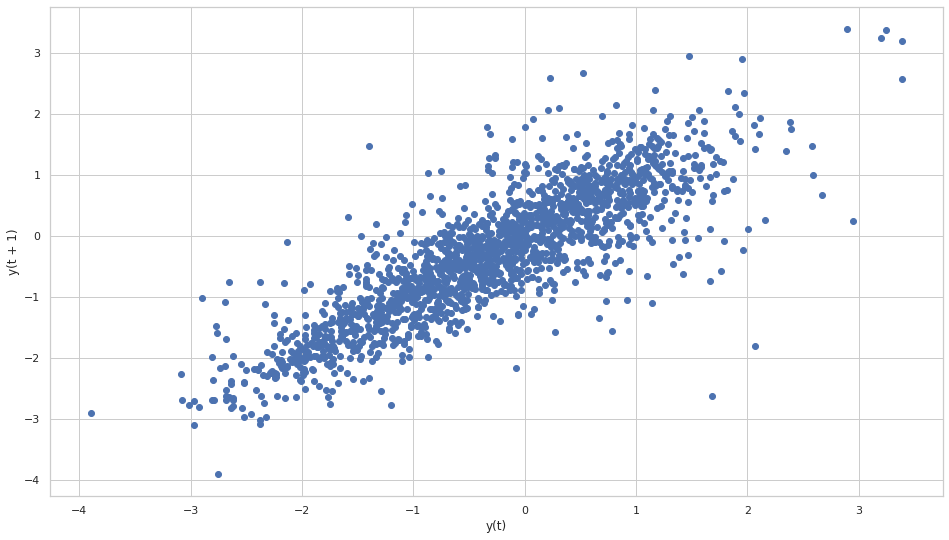

In [38]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1, c="b");

What are your conclusions from both visualizations?

In [11]:
# "rotationRate.x" is more auto-correlated than "userAcceleration.x"

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [40]:
from statsmodels.tsa.stattools import adfuller

In [70]:
af=adfuller(sensor["userAcceleration.x"])
af

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402787)

In [71]:
p_val=af[1]
p_val

2.823439483037483e-30

In [ ]:
# (Hipótesis nula) : La serie no es estacionaria y existe una tendencia estadísticamente significativa
# p_val << 0.05   por lo que rechazamos la hipótesis nula  -->  la serie ES estacionaria

In [73]:
af=adfuller(sensor["rotationRate.x"])

In [74]:
p_val=af[1]
p_val

6.320230335912605e-06

In [ ]:
# (Hipótesis nula) : La serie no es estacionaria y existe una tendencia estadísticamente significativa
# p_val << 0.05   por lo que rechazamos la hipótesis nula  -->  la serie ES estacionaria

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [65]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:

